In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv("D:\\projects\\iNeuron\\ml_eight\\quora-question-pairs\\train.csv\\train.csv")

In [3]:
df.head()


id  qid1  qid2                                          question1   
0   0     1     2  What is the step by step guide to invest in sh...  \
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [4]:
df.shape

(404290, 6)

In [5]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

id  qid1  qid2                                          question1   
0   0     1     2  What is the step by step guide to invest in sh...  \
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [11]:
df.groupby('is_duplicate')

In [12]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255024
1    149263
Name: count, dtype: int64


<Axes: xlabel='is_duplicate', ylabel='count'>

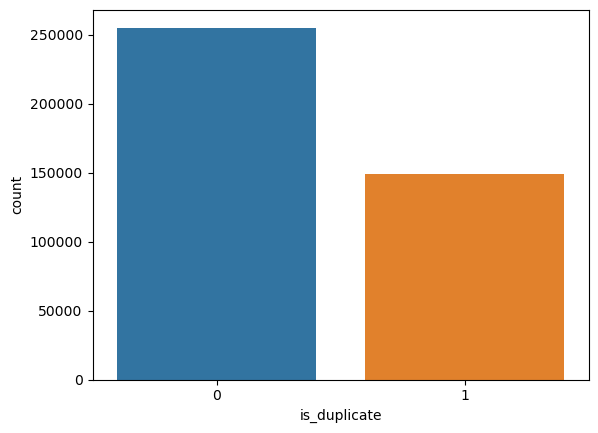

In [13]:
sns.countplot(df, x = 'is_duplicate')

 the dataset is little bit unbalanced

In [15]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions ",np.unique(qid).shape[0])
x = qid.value_counts() >1 
print("Number of repeated questions ", x[x].shape[0])

Number of unique questions  537929
Number of repeated questions  111778


In [18]:
np.unique(qid).shape

(537929,)

In [22]:
x[x].shape

(111778,)

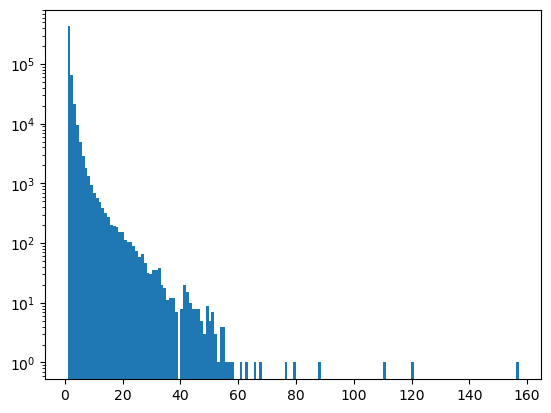

In [23]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [24]:
# taking small sample

In [25]:
new_df = df.sample(30000)


In [26]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [27]:
new_df = new_df[['question1', "question2"]]

# Tfidf vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
v = TfidfVectorizer(max_features=3000)

In [31]:
corpus = list(new_df['question1']) + list(new_df['question2'])

In [33]:
q1_arr , q2_arr = np.vsplit(v.fit_transform(corpus).toarray(),2)

In [37]:
df1 = pd.DataFrame(q1_arr, index = new_df.index)
df2 = pd.DataFrame(q2_arr, index = new_df.index)
df3 = pd.concat([df1, df1], axis=1)


In [38]:
df3['is_duplicate'] = df['is_duplicate']

In [39]:
df3.head()

0    1    2    3    4    5    6    7    8    9  ...  2991  2992   
4452    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  \
380751  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
41771   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
20222   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
216052  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

        2993      2994  2995  2996  2997  2998  2999  is_duplicate  
4452     0.0  0.000000   0.0   0.0   0.0   0.0   0.0             0  
380751   0.0  0.000000   0.0   0.0   0.0   0.0   0.0             0  
41771    0.0  0.000000   0.0   0.0   0.0   0.0   0.0             1  
20222    0.0  0.246876   0.0   0.0   0.0   0.0   0.0             0  
216052   0.0  0.000000   0.0   0.0   0.0   0.0   0.0             0  

[5 rows x 6001 columns]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,0:-1].values, df3.iloc[:,-1].values, test_size=0.2, random_state=42)

# RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

array([[3389,  354],
       [1295,  962]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.7251666666666666

In [43]:
confusion_matrix(y_test, y_pred)

array([[3389,  354],
       [1295,  962]], dtype=int64)

# Hyper Parameter Tuning

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()
parameters = {'n_estimators': [ 100,200,500,100],
              'max_depth':[None, 5, 10,15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(classifier, parameters)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
tuned_clf = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)